In [10]:
# imports
import os

import numpy as np
from megaman.geometry import Geometry

from embedding_algorithms import EmbeddingAlgorithms

In [11]:
def get_word2vec_data(n):
    """
    Loads the embedding file into a numpy array and then returns the numpy array
    Optional: In case we need corresponding words of embeddings, this function has the ability to map words with embeddings
    :param n: Number of samples to be prepared
    :return: numpy array of word2vec embeddings with n rows
    """
    folder_name = "../word2vec_datasets"
    file_name_npy = "word2vec_" + str(n) + ".npy"
    file_path_npy = os.path.join(folder_name, file_name_npy)
    file_name_txt = "word2vec_" + str(n) + ".txt"
    file_path_txt = os.path.join(folder_name, file_name_txt)
    X = np.load(file_path_npy)
    with open(file_path_txt) as f:
        words = f.readlines()
    words = [line[:-1] for line in words] # in case we need corresponding word of the vector
    return X

In [12]:
def get_geometry(radius):
    """
    Based on the radius, generates a Geometry object to be used for SpectralEmbedding algorithm then returns it
    :param radius: Radius for which the Geometry object will be generated
    :return: Geometry object containing customized parameters
    """
    return Geometry(
        adjacency_kwds={'radius': radius},
        adjacency_method='cyflann',  # auto, brute, pyflann, cyflann
        affinity_method='gaussian',  # auto or gaussian
        affinity_kwds={'radius': radius},
        laplacian_method='renormalized', # {'symmetricnormalized', 'geometric', 'renormalized', 'unnormalized', 'randomwalk'}
        laplacian_kwds = {'scaling_epps': radius}
    )

megaman - Spectral Embedding
t0: 2022-07-24 14:31:40.960909
t1: 2022-07-24 14:31:41.237995
Time diff: 0:00:00.277086


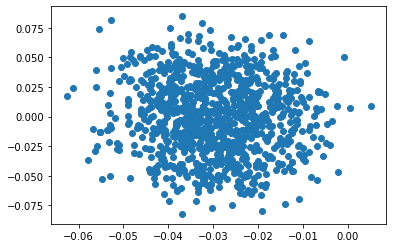

sklearn - Spectral Embedding
t0: 2022-07-24 14:31:41.444355
t1: 2022-07-24 14:31:41.802397
Time diff: 0:00:00.358042


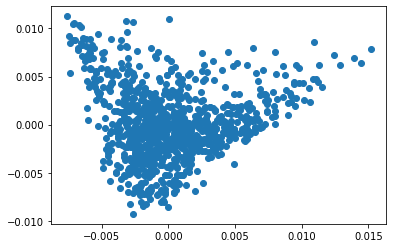

megaman - Spectral Embedding
t0: 2022-07-24 14:31:42.931999
t1: 2022-07-24 14:31:42.948179
Time diff: 0:00:00.016180


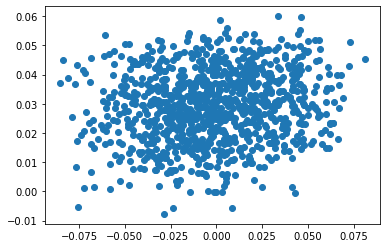

sklearn - Spectral Embedding
t0: 2022-07-24 14:31:43.132375
t1: 2022-07-24 14:34:38.887436
Time diff: 0:02:55.755061


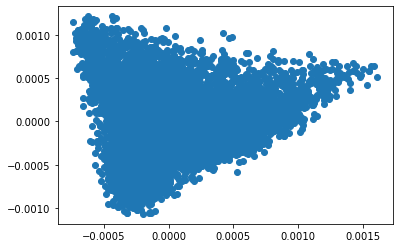

megaman - Spectral Embedding
t0: 2022-07-24 14:34:40.239466
t1: 2022-07-24 14:34:40.265317
Time diff: 0:00:00.025851


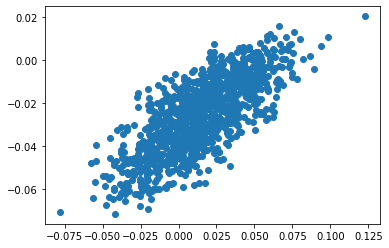

sklearn - Spectral Embedding
t0: 2022-07-24 14:34:40.449459

megaman - Spectral Embedding
t0: 2022-07-24 14:35:27.431686
t1: 2022-07-24 14:35:27.464191
Time diff: 0:00:00.032505


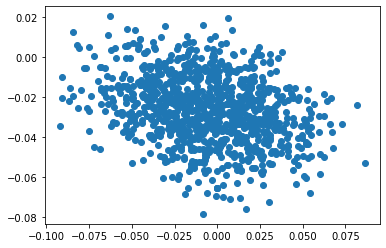

sklearn - Spectral Embedding
t0: 2022-07-24 14:35:27.652217
gstrf was called with invalid arguments


In [13]:
import warnings
# ignore warning to be printed on the output
warnings.filterwarnings("ignore", message="Graph is not fully connected.*")

# get geometry object with a specific radius for our case
geom = get_geometry(radius=.44)

# run spectral embedding algorithm for 4 different number of rows in data
for num_rows in [1000, 10000, 20000, 30000]:
    X = get_word2vec_data(n=num_rows)
    embedding_algos = EmbeddingAlgorithms(X=X, geom=geom)
    embedding_algos.run_all_algos(run_mm_se=True, run_sklearn_se=True)